# Milestone 1 – Citi Bike Boston: Vorhersage der Fahrtzeit

**Datensatz**: [Citi Bike Boston Trip Data](https://s3.amazonaws.com/hubway-data/202408-bluebikes-tripdata.zip), August 2024

**Prediction Task**: In this project, we are trying to predict the total number of bikes needed at each station throughout the day. We will examine data from different months and years to understand trends and build a predictive model for future demand. We also plan to include weather data as a feature, assuming it influences bike usage. A regression model will be used.

**Planned Features:**
- Start time (`started_at`)
- Day of the week (`weekday`)
- Time of day category (`time_of_day`)
- Duration in minutes (`minutes`)
- Start station (`start_station_id`)
- User type (`member_casual`)
- Weather (optional: temperature, rain)

This project uses data from August 2024, comprising approximately 530,000 trips.

# Milestone 1 – Citi Bike Boston: Vorhersage der Fahrtzeit

**Datensatz**: [Citi Bike Boston Trip Data](https://s3.amazonaws.com/hubway-data/202408-bluebikes-tripdata.zip), August 2024
**Prediction Task**: In this Project we are trying to predict the usage of the total amount of bikes needed at every station at the timespan of the day. We will be looking at different years of months and compare the data to understand the development over the last few years and with that develop a prediction model for the future usage of bikes. We also want to include weather data as an additional feature to improve the data. We do this because we think there is a correlation between the weather and the willingness to use bikes. As for the predictive Model we choose the regression Model.



**Planned Features:**

- Start time (`started_at`)
- Day of the week (`weekday`)
- Time of day category (`time_of_day`)
- Duration Time in Minutes (`minutes`)
- Start station (`start_station_id`)
- User type (`member_casual`)
- Weather (optional: temperature, rain)

This project uses data from August 2024, comprising approximately 530,000 trips.

In [1]:
import pandas as pd

csv_path = r"C:\Users\hanac\PycharmProjects\Data-Science-and-Machine-Learning\202408-bluebikes-tripdata.csv"

df = pd.read_csv(
    csv_path,
    engine="python",
    sep=None,
    on_bad_lines="skip",

)

print(df.shape)
df.head(1000000000)


(538262, 13)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,9555B91492D25570,classic_bike,01.08.2024 07:10,01.08.2024 07:26,Main St at Baldwin St,D32036,Purchase St at Pearl St,A32026,42.380.857,-71.070.629,42.354.659,-71.053.181,member
1,82D93E8BDD45E43F,electric_bike,12.08.2024 15:43,12.08.2024 15:46,75 Binney St,M32064,Cambridge Crossing at North First Street,M32077,4.236.550.728.505.650,-710.801.375.997.653,42.371.141,-71.076.198,member
2,C99E6E4F4C76DFF9,classic_bike,28.08.2024 21:06,28.08.2024 21:10,Copley Square - Dartmouth St at Boylston St,D32005,Prudential Center - 101 Huntington Ave,C32007,4.234.992.828.230.050,-7.107.739.206.866.420,4.234.652.003.998.410,-7.108.065.776.545.110,member
3,AB67BC6000A4D4CE,classic_bike,11.08.2024 13:14,11.08.2024 13:21,Ink Block - Harrison Ave at Herald St,C32025,Massachusetts Ave at Columbus Ave,C32004,42.345.901,-71.063.187,42.340.835,-710.816.197,member
4,C0B1FA5CE04B942F,electric_bike,12.08.2024 10:43,12.08.2024 11:59,Copley Square - Dartmouth St at Boylston St,D32005,Prudential Center - 101 Huntington Ave,C32007,4.234.992.828.230.050,-7.107.739.206.866.420,4.234.652.003.998.410,-7.108.065.776.545.110,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
538257,7C21E3D56C7059C4,electric_bike,01.08.2024 17:01,2024-08-01 17:08:40.036,Nashua Street at Red Auerbach Way,A32025,CambridgeSide Galleria - CambridgeSide PL at L...,M32019,42.365.673,-71.064.263,42.367.074.071.490.900,-7.107.679.277.658.460,member
538258,EF474D39EC6642EE,electric_bike,05.08.2024 12:23,05.08.2024 12:29,Commonwealth Ave at Agganis Way,A32002,Silber Way,D32032,4.235.169.201.885.970,-7.111.903.488.636.010,4.234.949.599.514.000,-7.110.057.592.391.960,member
538259,702A2E66C5554807,classic_bike,20.08.2024 21:32,20.08.2024 21:57,Nashua Street at Red Auerbach Way,A32025,Somerville High School & Central Library,S32048,42.365.673,-71.064.263,423.864,-7.109.601,member
538260,413E52E8A16DF605,classic_bike,26.08.2024 09:36,26.08.2024 09:47,Nashua Street at Red Auerbach Way,A32025,75 Binney St,M32064,42.365.673,-71.064.263,4.236.550.728.505.650,-710.801.375.997.653,member


In [2]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538262 entries, 0 to 538261
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ride_id             538262 non-null  object
 1   rideable_type       538262 non-null  object
 2   started_at          538262 non-null  object
 3   ended_at            538262 non-null  object
 4   start_station_name  538078 non-null  object
 5   start_station_id    538078 non-null  object
 6   end_station_name    537336 non-null  object
 7   end_station_id      537270 non-null  object
 8   start_lat           538262 non-null  object
 9   start_lng           538262 non-null  object
 10  end_lat             537860 non-null  object
 11  end_lng             537860 non-null  object
 12  member_casual       538262 non-null  object
dtypes: object(13)
memory usage: 53.4+ MB


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
count,538262,538262,538262,538262,538078,538078,537336,537270,538262,538262,537860,537860,538262
unique,538262,2,94485,93511,498,497,498,497,33091,33835,521,524,2
top,F8DCEA0E9862A168,classic_bike,08.08.2024 17:16,19.08.2024 17:34,MIT at Mass Ave / Amherst St,M32006,MIT at Mass Ave / Amherst St,M32006,423.581,-71.093.198,423.581,-71.093.198,member
freq,1,404849,60,58,8276,8276,7965,7965,8032,8032,7965,7965,357704


In [3]:
import pandas as pd


csv_path = r"C:\Users\hanac\PycharmProjects\Data-Science-and-Machine-Learning\202408-bluebikes-tripdata.csv"
df = pd.read_csv(csv_path, engine="python", sep=None, on_bad_lines="warn")

print("Ursprünglicher Datensatz:")
print(df.shape)


df['started_at'] = pd.to_datetime(df['started_at'], dayfirst=True, errors='coerce')
df['ended_at'] = pd.to_datetime(df['ended_at'], dayfirst=True, errors='coerce')
print("Nach datetime-Konvertierung:")
print(df.shape)


df = df.dropna(subset=['started_at', 'ended_at'])
print("Nach Entfernen von NaT-Zeilen:")
print(df.shape)


df['tripduration'] = (df['ended_at'] - df['started_at']).dt.total_seconds()


df = df[df['tripduration'] > 0]
print("Nach Entfernen negativer/0-Fahrzeiten:")
print(df.shape)


df['tripduration'] = pd.to_numeric(df['tripduration'], errors='coerce')


df['duration_min'] = df['tripduration'] / 60


print("\n Spaltentypen von tripduration und duration_min:")
print(df[['tripduration', 'duration_min']].dtypes)

print("\n Beispielhafte Einträge:")
print(df[['started_at', 'ended_at', 'tripduration', 'duration_min']].head())


Ursprünglicher Datensatz:
(538262, 13)
Nach datetime-Konvertierung:
(538262, 13)
Nach Entfernen von NaT-Zeilen:
(435181, 13)
Nach Entfernen negativer/0-Fahrzeiten:
(435181, 14)

 Spaltentypen von tripduration und duration_min:
tripduration    float64
duration_min    float64
dtype: object

 Beispielhafte Einträge:
           started_at            ended_at  tripduration  duration_min
0 2024-08-01 07:10:00 2024-08-01 07:26:00         960.0          16.0
1 2024-08-12 15:43:00 2024-08-12 15:46:00         180.0           3.0
2 2024-08-28 21:06:00 2024-08-28 21:10:00         240.0           4.0
3 2024-08-11 13:14:00 2024-08-11 13:21:00         420.0           7.0
4 2024-08-12 10:43:00 2024-08-12 11:59:00        4560.0          76.0


In [4]:

df['weekday'] = df['started_at'].dt.weekday
df['hour'] = df['started_at'].dt.hour


def get_time_category(hour):
    if 6 <= hour < 12:
        return 'Morgen'
    elif 12 <= hour < 18:
        return 'Midday'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['hour'].apply(get_time_category)


## Nächste Schritte (Milestone 2+)

The next steps will include the data preparation. Our goal here will be to sort the Data of the days of the month in time boxes for example morning, noon, afternoon, evening etc. With this we can accumulate the highest average of use-time through the day as well as highest and lowest peaks.


✅ Übrig gebliebene Datenpunkte: 165


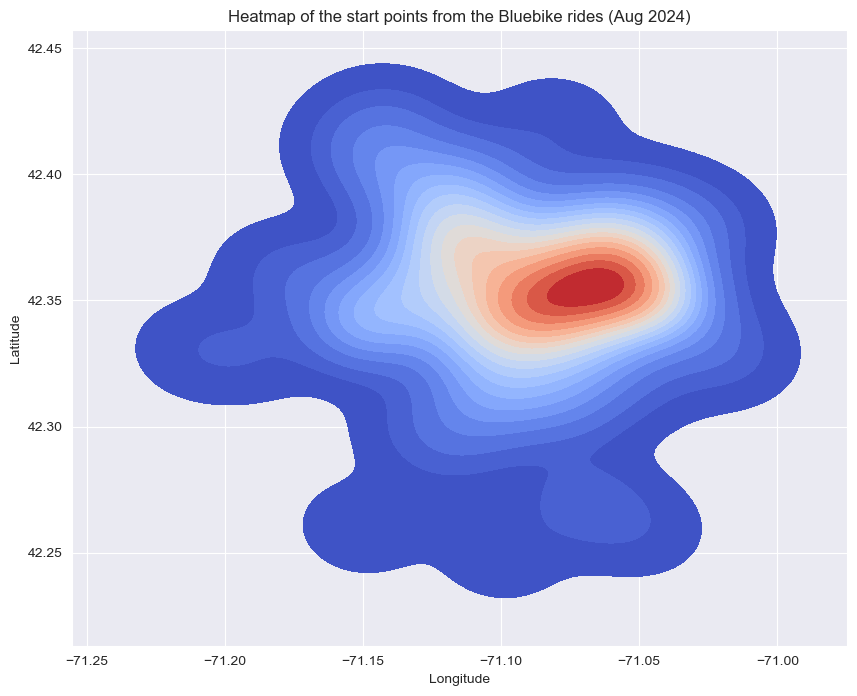

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV einlesen (trennzeichen anpassen, Fehlerhafte Zeilen überspringen)
df_trips = pd.read_csv('202408-bluebikes-tripdata.csv', sep=';', on_bad_lines='skip')

# Startzeitpunkt in datetime umwandeln
df_trips['started_at'] = pd.to_datetime(df_trips['started_at'], format='%d.%m.%Y %H:%M', errors='coerce')

# Entferne Zeilen mit ungültigem Datum
df_trips = df_trips.dropna(subset=['started_at'])

# Spalten für Koordinaten in Zahlen umwandeln
for col in ['start_lat', 'start_lng', 'end_lat', 'end_lng']:
    df_trips[col] = pd.to_numeric(df_trips[col], errors='coerce')

# Entferne Zeilen mit fehlenden Koordinaten
df_trips = df_trips.dropna(subset=['start_lat', 'start_lng'])

# Filtere unrealistische Koordinaten (Boston liegt grob in diesem Bereich)
df_trips = df_trips[
    (df_trips['start_lat'] > 42.0) & (df_trips['start_lat'] < 43.0) &
    (df_trips['start_lng'] > -72.0) & (df_trips['start_lng'] < -70.0)
]

# Ausgabe zur Kontrolle
print("✅ Übrig gebliebene Datenpunkte:", len(df_trips))

# Heatmap plotten
plt.figure(figsize=(10, 8))
sns.kdeplot(
    x=df_trips['start_lng'],
    y=df_trips['start_lat'],
    cmap="coolwarm",
    fill=True,
    thresh=0.01,
    levels=20
)
plt.title('Heatmap of the start points from the Bluebike rides (Aug 2024)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



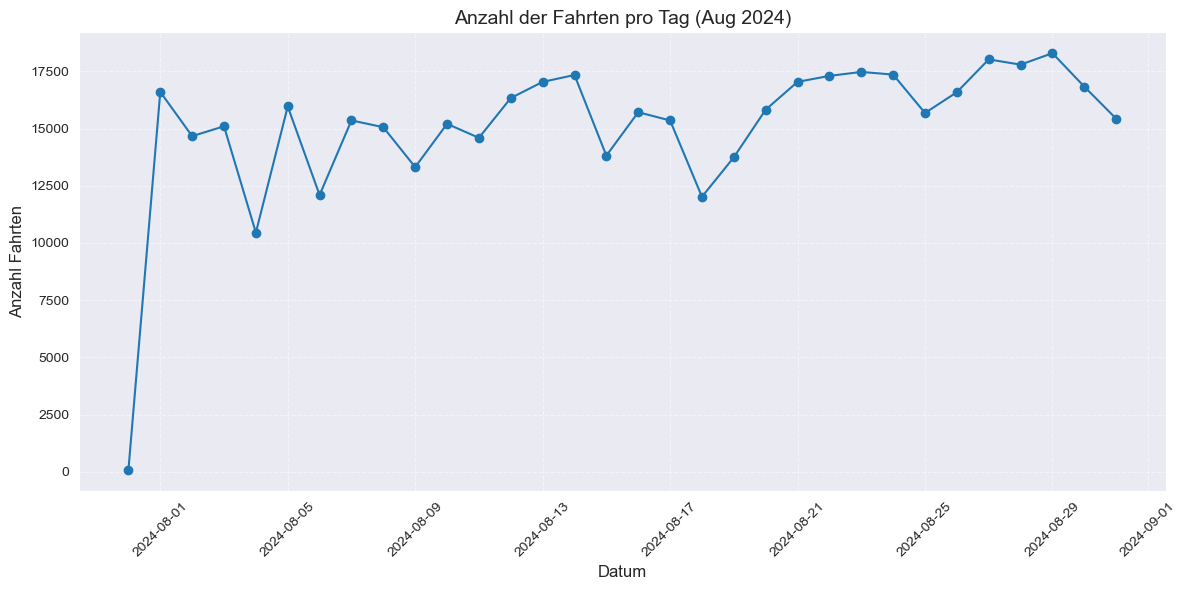

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) CSV-Datei einlesen (semikolon-getrennt)
df_trips = pd.read_csv('202408-bluebikes-tripdata.csv', sep=';')

# 2) 'started_at' in datetime umwandeln (Tag.Monat.Jahr Stunden:Minuten)
df_trips['started_at'] = pd.to_datetime(
    df_trips['started_at'],
    format='%d.%m.%Y %H:%M',
    dayfirst=True,
    errors='coerce'
)

# 3) Ungültige oder fehlende Zeitstempel entfernen
df_trips = df_trips.dropna(subset=['started_at'])

# 4) Nur das Datum extrahieren
df_trips['date'] = df_trips['started_at'].dt.date

# 5) Anzahl der Fahrten pro Tag berechnen
fahrten_pro_tag = df_trips.groupby('date').size()

# 6) Plot erzeugen
plt.figure(figsize=(12, 6))
fahrten_pro_tag.plot(
    marker='o',
    linestyle='-',
    linewidth=1.5
)
plt.title("Anzahl der Fahrten pro Tag (Aug 2024)", fontsize=14)
plt.xlabel("Datum", fontsize=12)
plt.ylabel("Anzahl Fahrten", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


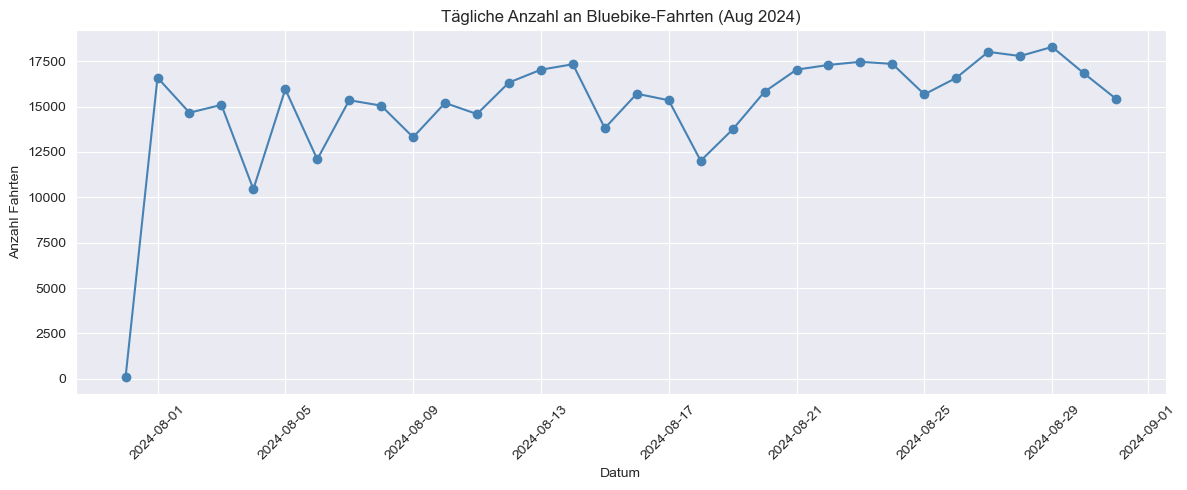

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV einlesen
df_trips = pd.read_csv('202408-bluebikes-tripdata.csv', sep=';', on_bad_lines='skip')

# Datum parsen
df_trips['started_at'] = pd.to_datetime(df_trips['started_at'], format='%d.%m.%Y %H:%M', errors='coerce')
df_trips = df_trips.dropna(subset=['started_at'])

# Index setzen
df_trips.set_index('started_at', inplace=True)

# Tägliche Anzahl berechnen
daily_counts = df_trips.resample('D').size()

# Plot
plt.figure(figsize=(12, 5))
plt.plot(daily_counts, marker='o', linestyle='-', color='steelblue')
plt.title('Tägliche Anzahl an Bluebike-Fahrten (Aug 2024)')
plt.xlabel('Datum')
plt.ylabel('Anzahl Fahrten')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns
#
## CSV einlesen
#df_trips = pd.read_csv('202408-bluebikes-tripdata.csv', sep=';', on_bad_lines='skip')
#
## Datum parsen
#df_trips['started_at'] = pd.to_datetime(df_trips['started_at'], format='%d.%m.%Y %H:%M', errors='coerce')
#df_trips = df_trips.dropna(subset=['started_at'])
#
## Funktion zur Kategorisierung der Tageszeiten
#def get_daytime(hour):
#    if 5 <= hour < 11:
#        return 'Morning (05–11 Uhr)'
#    elif 11 <= hour < 17:
#        return 'Midday (11–17 Uhr)'
#    elif 17 <= hour < 21:
#        return 'Evening (17–21 Uhr)'
#    else:
#        return 'Night (21–05 Uhr)'
#
## Tageszeit ermitteln
#df_trips['hour'] = df_trips['started_at'].dt.hour
#df_trips['daytime'] = df_trips['hour'].apply(get_daytime)
#
## Werte zählen, in gewünschter Reihenfolge
#daytime_counts = df_trips['daytime'].value_counts().reindex([
#    'Morning (05–11 Uhr)',
#    'Midday (11–17 Uhr)',
#    'Evening (17–21 Uhr)',
#    'Night (21–05 Uhr)'
#])
#
## Balkendiagramm zeichnen
#plt.figure(figsize=(10, 6))
#sns.barplot(x=daytime_counts.index, y=daytime_counts.values, palette='coolwarm')
#plt.title('Anzahl der Fahrten nach Tageszeit (Aug 2024)')
#plt.xlabel('Tageszeit')
#plt.ylabel('Anzahl der Fahrten')
#plt.xticks(rotation=15)
#plt.grid(True, axis='y', linestyle='--', alpha=0.7)
#plt.tight_layout()
#plt.show()


In [9]:
#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns


#csv_path = r"C:\Users\hanac\PycharmProjects\Data-Science-and-Machine-Learning\202408-bluebikes-tripdata.csv"
#df = pd.read_csv(csv_path, engine="python", sep=None, on_bad_lines="skip")


#df['started_at'] = pd.to_datetime(df['started_at'], errors='coerce')


#df = df.dropna(subset=['started_at'])


#def get_daytime(hour):
#    if 5 <= hour < 11:
#        return 'Morning (05–11 Uhr)'
#    elif 11 <= hour < 17:
#        return 'Midday (11–17 Uhr)'
#    elif 17 <= hour < 21:
#        return 'Evening (17–21 Uhr)'
#    else:
#        return 'Night (21–05 Uhr)'

#df['hour'] = df['started_at'].dt.hour
#df['daytime'] = df['hour'].apply(get_daytime)


#order = ['Morning (05–11 Uhr)', 'Midday (11–17 Uhr)', 'Evening (17–21 Uhr)', 'Night (21–05 Uhr)']
#daytime_counts = df['daytime'].value_counts().reindex(order)


#plt.figure(figsize=(10, 6))
#sns.barplot(x=daytime_counts.index, y=daytime_counts.values, palette='coolwarm')
#plt.title('Amount of drives per daytime')
#plt.xlabel('Daytime')
#plt.ylabel('Amount of drives')
#plt.xticks(rotation=15)
#plt.tight_layout()
#plt.show()



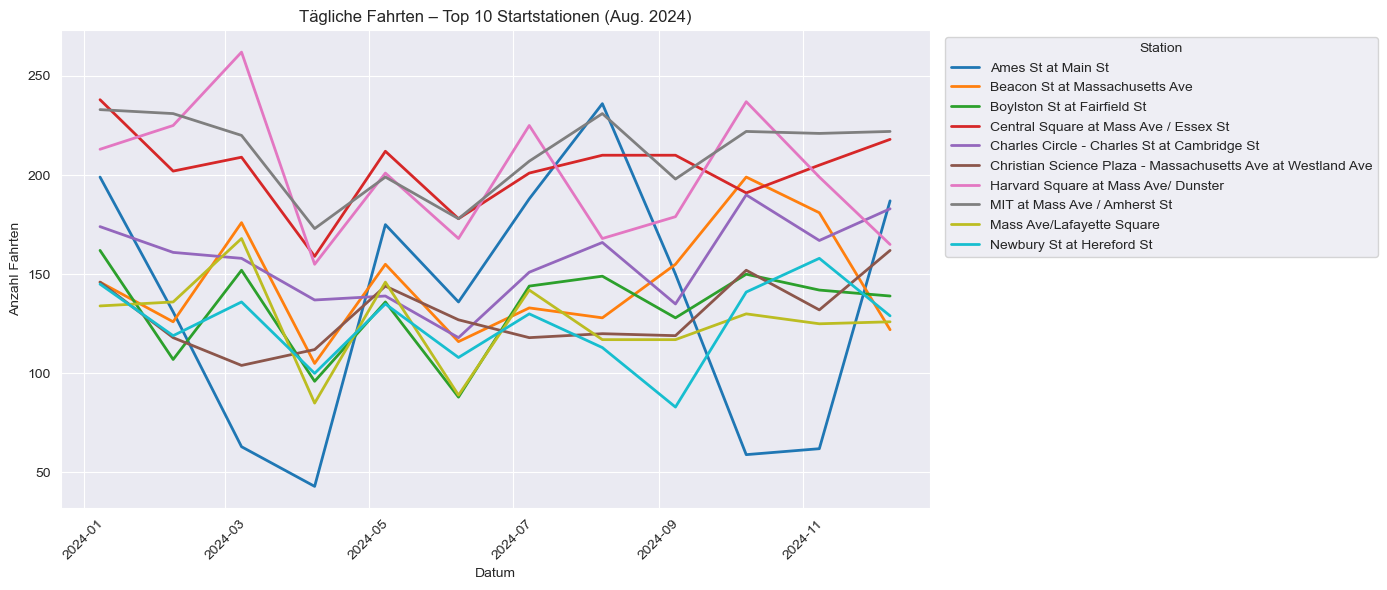

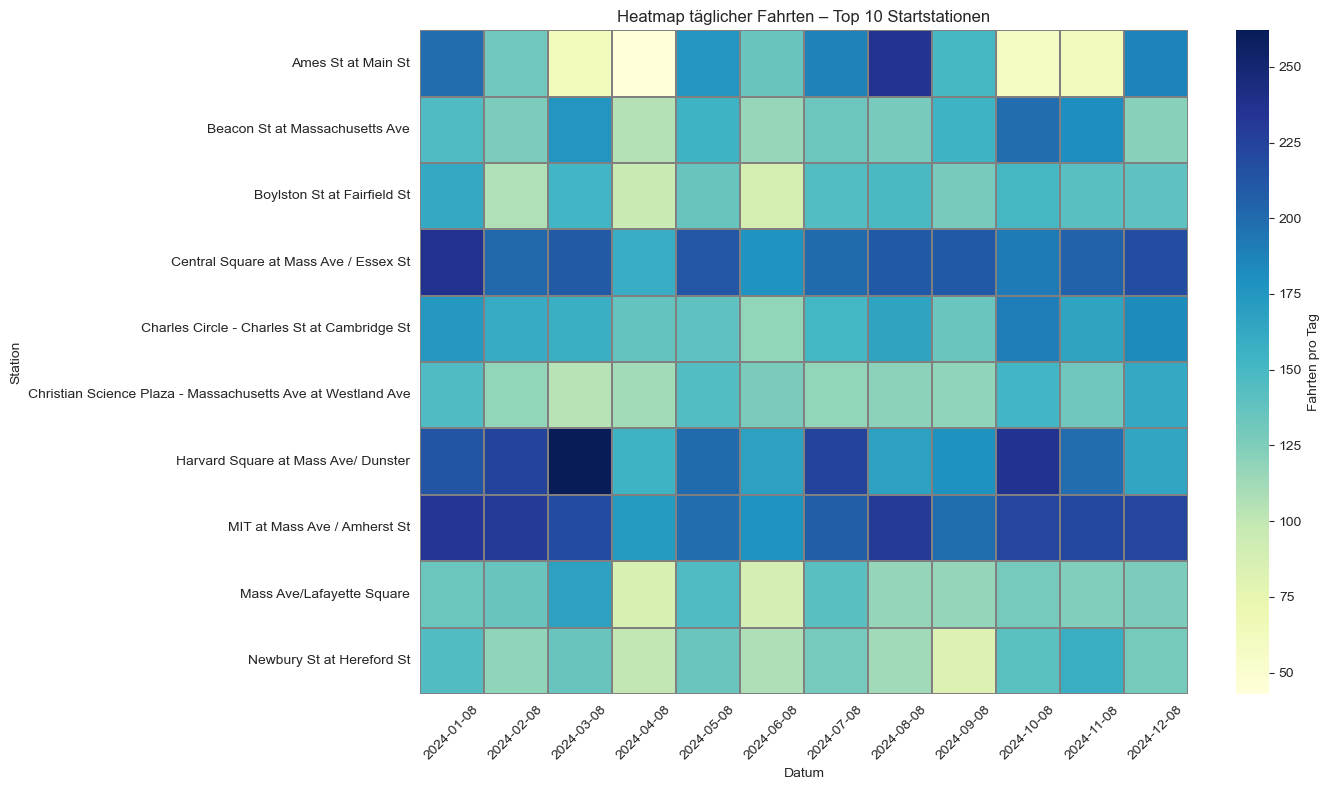

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Daten einlesen
df = pd.read_csv('202408-bluebikes-tripdata.csv', sep=';')

# Startzeit-Spalte automatisch erkennen
datetime_col = next(
    (col for col in df.columns if 'start' in col.lower() and ('at' in col.lower() or 'time' in col.lower())),
    None
)
if datetime_col is None:
    raise ValueError("Keine gültige Startzeit-Spalte gefunden.")

# In Datetime umwandeln
df[datetime_col] = pd.to_datetime(df[datetime_col], errors='coerce')
df = df.dropna(subset=[datetime_col])

# Nur das Datum extrahieren
df['date'] = df[datetime_col].dt.date

# Anzahl Fahrten pro Startstation gesamt berechnen
station_totals = df['start_station_name'].value_counts()

# Nur die Top-10-Stationen behalten
top_stations = station_totals.head(10).index
df_top = df[df['start_station_name'].isin(top_stations)]

# Gruppieren nach Station und Datum
usage = (
    df_top
    .groupby(['start_station_name', 'date'])
    .size()
    .reset_index(name='trip_count')
)

# Pivot-Tabelle (Datum × Top-Stationen)
usage_pivot = (
    usage
    .pivot(index='date', columns='start_station_name', values='trip_count')
    .fillna(0)
)

# ----------- 📈 Liniendiagramm der Top 10 Stationen -----------
plt.figure(figsize=(14, 6))
for station in usage_pivot.columns:
    plt.plot(usage_pivot.index, usage_pivot[station], lw=2, label=station)

plt.xlabel('Datum')
plt.ylabel('Anzahl Fahrten')
plt.title('Tägliche Fahrten – Top 10 Startstationen (Aug. 2024)')
plt.legend(title='Station', loc='upper left', bbox_to_anchor=(1.01, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ----------- 🔥 Heatmap aller Stationen -----------
plt.figure(figsize=(14, 8))
sns.heatmap(
    usage_pivot.T,
    cmap='YlGnBu',
    cbar_kws={'label': 'Fahrten pro Tag'},
    linewidths=0.3,
    linecolor='gray'
)
plt.xlabel('Datum')
plt.ylabel('Station')
plt.title('Heatmap täglicher Fahrten – Top 10 Startstationen')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

df = pd.read_csv("202408-bluebikes-tripdata.csv", sep=";")

df['started_at'] = pd.to_datetime(df['started_at'], format="%d.%m.%Y %H:%M", errors='coerce')
df['ended_at'] = pd.to_datetime(df['ended_at'], format="%d.%m.%Y %H:%M", errors='coerce')

df['duration_min'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

df = df.dropna(subset=['started_at', 'ended_at', 'duration_min', 'start_station_name', 'end_station_name'])
df = df[df['duration_min'] > 0]
df = df[df['duration_min'] < 120]

df['hour'] = df['started_at'].dt.hour
df['weekday'] = df['started_at'].dt.weekday
df['month'] = df['started_at'].dt.month

# Begrenze die Anzahl der Stationen: nur die Top 20 häufigsten Start- und Endstationen
top_start_stations = df['start_station_name'].value_counts().nlargest(20).index
top_end_stations = df['end_station_name'].value_counts().nlargest(20).index
df = df[df['start_station_name'].isin(top_start_stations) & df['end_station_name'].isin(top_end_stations)]

features = ['start_station_name', 'end_station_name', 'hour', 'weekday', 'month']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(df[features])
X = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(features))
y = df['duration_min']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Weniger Bäume und max_depth reduzieren
model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f} Minuten")


RMSE: 13.66 Minuten


C:\Users\hanac\AppData\Local\Temp\ipykernel_20500\877090786.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top10['week'] = pd.to_datetime(df_top10['date']).dt.to_period('W').apply(lambda r: r.start_time)


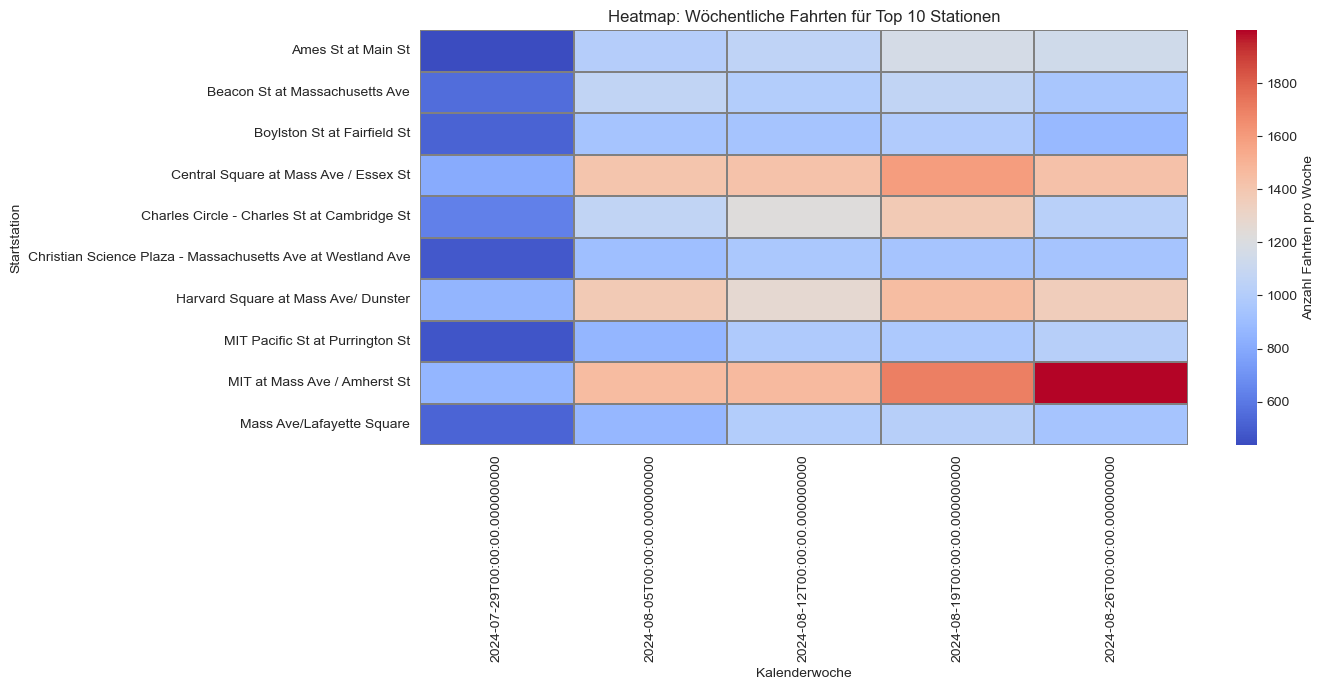

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV & Datumsparsing wie gehabt
df = pd.read_csv('202408-bluebikes-tripdata.csv', sep=';')
df['started_at'] = pd.to_datetime(df['started_at'], dayfirst=True, errors='coerce')
df['date'] = df['started_at'].dt.date
df_clean = df.dropna(subset=['start_station_name', 'date'])

# Top 10 Stationen nach Gesamtfahrten
top10 = (
    df_clean.groupby('start_station_name')
    .size()
    .sort_values(ascending=False)
    .head(10)
    .index
)

df_top10 = df_clean[df_clean['start_station_name'].isin(top10)]

# Wöchentliche Aggregation (Kalenderwochen)
df_top10['week'] = pd.to_datetime(df_top10['date']).dt.to_period('W').apply(lambda r: r.start_time)

usage_weekly = (
    df_top10.groupby(['start_station_name', 'week'])
    .size()
    .reset_index(name='trip_count')
)

usage_pivot_weekly = usage_weekly.pivot(index='week', columns='start_station_name', values='trip_count').fillna(0)

# Heatmap mit Wochen und Top 10 Stationen
plt.figure(figsize=(14, 7))
sns.heatmap(
    usage_pivot_weekly.T,
    cmap='coolwarm',
    cbar_kws={'label': 'Anzahl Fahrten pro Woche'},
    linewidths=0.3,
    linecolor='gray'
)
plt.title('Heatmap: Wöchentliche Fahrten für Top 10 Stationen')
plt.xlabel('Kalenderwoche')
plt.ylabel('Startstation')
plt.tight_layout()
plt.show()


In [13]:
import pandas as pd

df = pd.read_csv(
    '202408-bluebikes-tripdata.csv',
    engine='python',
    sep=None,
    on_bad_lines='skip'
)


print("Loaded columns:", df.columns.tolist())
df.head()
import pandas as pd

df = pd.read_csv(
    '202408-bluebikes-tripdata.csv',
    engine='python',
    sep=None,
    on_bad_lines='skip'
)


print("Loaded columns:", df.columns.tolist())
df.head()

Loaded columns: ['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual']
Loaded columns: ['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual']


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,9555B91492D25570,classic_bike,01.08.2024 07:10,01.08.2024 07:26,Main St at Baldwin St,D32036,Purchase St at Pearl St,A32026,42.380.857,-71.070.629,42.354.659,-71.053.181,member
1,82D93E8BDD45E43F,electric_bike,12.08.2024 15:43,12.08.2024 15:46,75 Binney St,M32064,Cambridge Crossing at North First Street,M32077,4.236.550.728.505.650,-710.801.375.997.653,42.371.141,-71.076.198,member
2,C99E6E4F4C76DFF9,classic_bike,28.08.2024 21:06,28.08.2024 21:10,Copley Square - Dartmouth St at Boylston St,D32005,Prudential Center - 101 Huntington Ave,C32007,4.234.992.828.230.050,-7.107.739.206.866.420,4.234.652.003.998.410,-7.108.065.776.545.110,member
3,AB67BC6000A4D4CE,classic_bike,11.08.2024 13:14,11.08.2024 13:21,Ink Block - Harrison Ave at Herald St,C32025,Massachusetts Ave at Columbus Ave,C32004,42.345.901,-71.063.187,42.340.835,-710.816.197,member
4,C0B1FA5CE04B942F,electric_bike,12.08.2024 10:43,12.08.2024 11:59,Copley Square - Dartmouth St at Boylston St,D32005,Prudential Center - 101 Huntington Ave,C32007,4.234.992.828.230.050,-7.107.739.206.866.420,4.234.652.003.998.410,-7.108.065.776.545.110,member


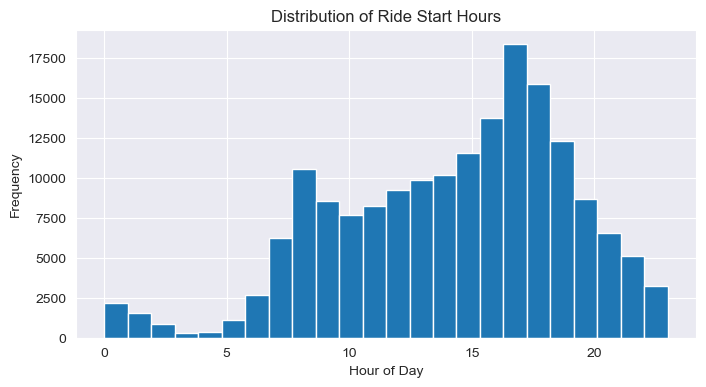

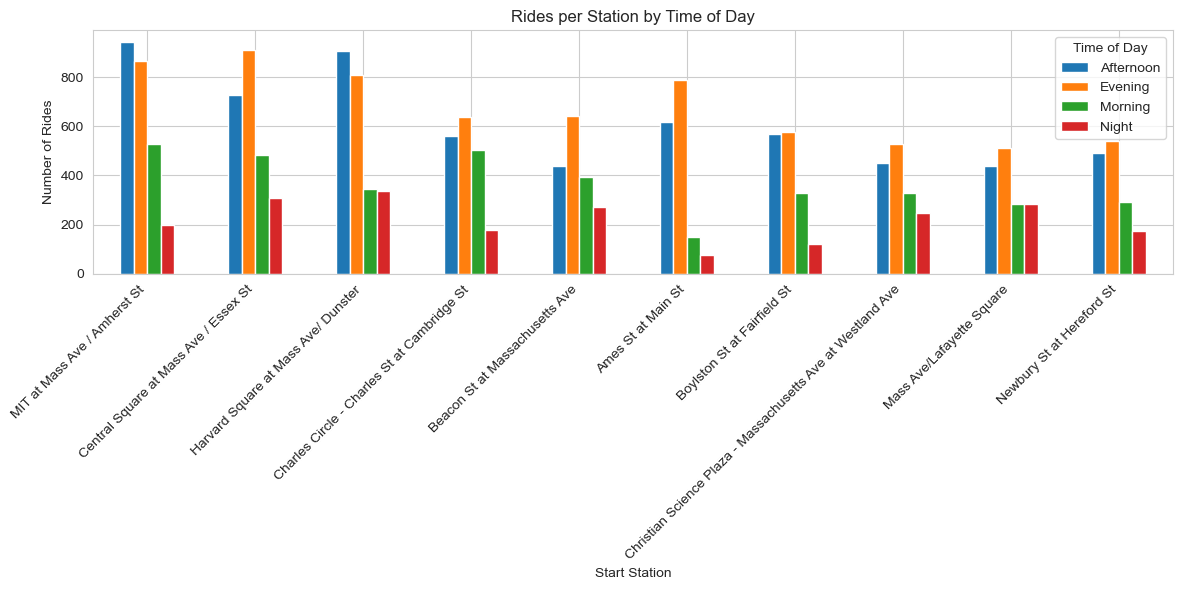

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv(
    '202408-bluebikes-tripdata.csv',
    engine='python',
    sep=None,
    on_bad_lines='skip'
)


df['started_at'] = pd.to_datetime(df['started_at'], errors='coerce')


df = df.dropna(subset=['started_at'])


df['hour'] = df['started_at'].dt.hour


df['hour'].plot.hist(bins=24, figsize=(8, 4), title='Distribution of Ride Start Hours')
plt.xlabel("Hour of Day")
plt.show()


def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day_category'] = df['hour'].apply(get_time_of_day)


rides_by_station_time = (
    df.groupby(['start_station_name', 'time_of_day_category'])
      .size()
      .reset_index(name='ride_count')
)


pivot_df = rides_by_station_time.pivot(
    index='start_station_name',
    columns='time_of_day_category',
    values='ride_count'
).fillna(0)


top10 = pivot_df.sum(axis=1).nlargest(10).index
pivot_top10 = pivot_df.loc[top10]


sns.set_style("whitegrid")
pivot_top10.plot(kind='bar', figsize=(12, 6))
plt.title('Rides per Station by Time of Day')
plt.xlabel('Start Station')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Time of Day')
plt.tight_layout()
plt.show()